In [1]:
import xarray as xr
import os
import numpy as np
import yt # just to get the data directory 
import cartopy.feature as cfeature
import cartopy.crs as ccrs

ddir = os.path.join(yt.config.ytcfg.get('yt','test_data_dir'), 'sample_nc')

datasets = {
    "internal_geographic_partial": os.path.join(ddir,'wUS-SH-2010_percent.nc'), 
    "internal_geographic_global": os.path.join(ddir,'GYPSUM_percent.nc'), 
    "external_geographic_global": os.path.join(ddir,'geos_test.nc4'),
}

In [17]:
ds = xr.open_dataset(datasets["internal_geographic_partial"])

In [18]:
ds

<xarray.Dataset>
Dimensions:    (depth: 19, latitude: 93, longitude: 122)
Coordinates:
  * depth      (depth) float32 60.0 90.0 125.0 160.0 ... 700.0 760.0 820.0 885.0
  * latitude   (latitude) float32 27.5 27.75 28.0 28.25 ... 50.0 50.25 50.5
  * longitude  (longitude) float32 -125.8 -125.5 -125.2 ... -96.0 -95.75 -95.5
Data variables:
    dvp        (depth, latitude, longitude) float32 ...
    dvs        (depth, latitude, longitude) float32 ...
Attributes: (12/32)
    title:                         P and S teleseismic body-wave tomography o...
    id:                            wUS-SH-2010_percent
    summary:                       Teleseismic travel-time residuals from the...
    keywords:                      seismic, tomography, compressional wave, p...
    Conventions:                   CF-1.0
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    ...                            ...
    author_email:                  bschmandt@unm.edu
    author_institution:            Department of Earth and Planetary Science,...
    author_url:                    
    repository_name:               EMC
    repository_institution:        IRIS DMC
    repository_pid:                doi:10.17611/DP/9991760

## The data's CRS

The coordinate reference system (CRS) is the reference on which the data is measured -- the underlying coordinate system. Generally, these will be:

In [25]:
ccrs.Geodetic?

Init signature: ccrs.Geodetic(globe=None)
Docstring:     
Define a latitude/longitude coordinate system with spherical topology,
geographical distance and coordinates are measured in degrees.
Init docstring:
Parameters
----------
globe: A :class:`cartopy.crs.Globe`, optional
    Defaults to a "WGS84" datum.
File:           ~/miniconda3/envs/yt_py39/lib/python3.9/site-packages/cartopy/crs.py
Type:           type
Subclasses:     


In [26]:
ccrs.Geocentric?

Init signature: ccrs.Geocentric(globe=None)
Docstring:     
Define a Geocentric coordinate system, where x, y, z are Cartesian
coordinates from the center of the Earth.
Init docstring:
Parameters
----------
globe: A :class:`cartopy.crs.Globe`, optional
    Defaults to a "WGS84" datum.
File:           ~/miniconda3/envs/yt_py39/lib/python3.9/site-packages/cartopy/crs.py
Type:           type
Subclasses:     


In [27]:
ccrs.Globe?

Init signature:
ccrs.Globe(
    datum=None,
    ellipse='WGS84',
    semimajor_axis=None,
    semiminor_axis=None,
    flattening=None,
    inverse_flattening=None,
    towgs84=None,
    nadgrids=None,
)
Docstring:      Define an ellipsoid and, optionally, how to relate it to the real world.
Init docstring:
Parameters
----------
datum
    Proj "datum" definition. Defaults to None.
ellipse
    Proj "ellps" definition. Defaults to 'WGS84'.
semimajor_axis
    Semimajor axis of the spheroid / ellipsoid.  Defaults to None.
semiminor_axis
    Semiminor axis of the ellipsoid.  Defaults to None.
flattening
    Flattening of the ellipsoid.  Defaults to None.
inverse_flattening
    Inverse flattening of the ellipsoid.  Defaults to None.
towgs84
    Passed through to the Proj definition.  Defaults to None.
nadgrids
    Passed through to the Proj definition.  Defaults to None.
File:           ~/miniconda3/envs/yt_py39/lib/python3.9/site-packages/cartopy/crs.py
Type:           type
Subclasses:     

The projection describes the process of going from the coordinate system to a 2D surface for displaying. e.g., 

In [32]:
ccrs.PlateCarree?

Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           ~/miniconda3/envs/yt_py39/lib/python3.9/site-packages/cartopy/crs.py
Type:           ABCMeta
Subclasses:     


In [33]:
ccrs.Mollweide?

Init signature:
ccrs.Mollweide(
    central_longitude=0,
    globe=None,
    false_easting=None,
    false_northing=None,
)
Docstring:     
A Mollweide projection.

This projection is pseudocylindrical, and equal area. Parallels are
unequally-spaced straight lines, while meridians are elliptical arcs up to
semicircles on the edges. Poles are points.

It is commonly used for world maps, or interrupted with several central
meridians.
Init docstring:
Parameters
----------
central_longitude: float, optional
    The central longitude. Defaults to 0.
false_easting: float, optional
    X offset from planar origin in metres. Defaults to 0.
false_northing: float, optional
    Y offset from planar origin in metres. Defaults to 0.
globe: :class:`cartopy.crs.Globe`, optional
    If omitted, a default globe is created.

    .. note::
        This projection does not handle elliptical globes.
File:           ~/miniconda3/envs/yt_py39/lib/python3.9/site-packages/cartopy/crs.py
Type:           ABCMeta

In [34]:
import yt

In [1]:
import xarray as xr
import yt
import os
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs

ddir = os.path.join(yt.config.ytcfg.get('yt', 'test_data_dir'), 'sample_nc')

# https://ds.iris.edu/files/products/emc/emc-files/GYPSUM_percent.nc : a global model
# https://ds.iris.edu/files/products/emc/emc-files/wUS-SH-2010_percent.nc : a non-global model covering the western US


datasets = {
    "internal_geographic_partial": os.path.join(ddir, 'wUS-SH-2010_percent.nc'),
    "internal_geographic_global": os.path.join(ddir, 'GYPSUM_percent.nc'),
}


def get_internal_IRIS(case):
    # both datasets have the same variables and dimension order

    fi = datasets[case]

    with xr.open_dataset(fi) as xr_ds:
        dvs = xr_ds.dvs.to_masked_array().data
        deprng = [xr_ds.depth.data.min(), xr_ds.depth.data.max()]
        lonrng = [xr_ds.longitude.data.min(), xr_ds.longitude.data.max()]
        latrng = [xr_ds.latitude.data.min(), xr_ds.latitude.data.max()]

    data = {'dvs': (dvs, "%")}

    bbox = np.array([
        deprng,
        latrng,
        lonrng
    ])

    dims = ['depth', 'latitude', 'longitude']

    return yt.load_uniform_grid(data, data['dvs'][0].shape, 1.0,
                                geometry=("internal_geographic", dims),
                                bbox=bbox)


ds = get_internal_IRIS("internal_geographic_global")

c = ds.domain_center
c[0] = 100
p = yt.SlicePlot(ds,'depth','dvs', center=c)
# p.set_mpl_projection('Robinson')
p.set_log('dvs',False)
p.set_zlim('dvs',-8, 8)
p.set_cmap('dvs','magma_r')

p._setup_plots()
carto_ax = p.plots['dvs'].axes
carto_ax.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '10m',
        edgecolor='black', facecolor='none'))
p.show()

yt : [INFO     ] 2022-07-29 14:11:55,451 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-07-29 14:11:55,452 Parameters: domain_dimensions         = [100 181 361]
yt : [INFO     ] 2022-07-29 14:11:55,453 Parameters: domain_left_edge          = [   0.  -90. -180.]
yt : [INFO     ] 2022-07-29 14:11:55,453 Parameters: domain_right_edge         = [2900.   90.  180.]
yt : [INFO     ] 2022-07-29 14:11:55,454 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-07-29 14:11:55,539 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-07-29 14:11:55,540 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-07-29 14:11:55,540 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-07-29 14:11:55,541 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-07-29 14:11:55,542 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-07-29 14:11:55,544 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
yt : [WARNING  ] 2022-07-29 14:11:55,568 Plottin

hello extent: [-180.0, 180.0, -90.0, 90.0]


ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=(-18040095.696147293, 18040095.696147293), y_limits=(-9020047.847897757, 9020047.847897757)).

In [2]:
import cartopy 
import matplotlib.pyplot as plt 



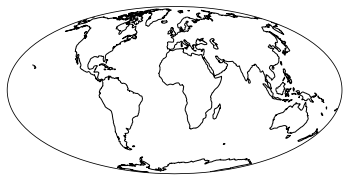

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()

In [7]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      ~/miniconda3/envs/yt_py39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py
Type:      method


In [8]:
ax.set_extent((-180, 180, -90, 90))

ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=(-18040095.696147293, 18040095.696147293), y_limits=(-9020047.847897757, 9020047.847897757)).

In [9]:
ax.set_extent((-180, 180, -90, 90), crs=cartopy.crs.Geodetic())

ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=(-18040095.696147293, 18040095.696147293), y_limits=(-9020047.847897757, 9020047.847897757)).

In [10]:
ax.set_global()

In [11]:
ax.get_extent()

(-18040095.696147293,
 18040095.696147293,
 -9020047.847897757,
 9020047.847897757)

In [12]:
t = ccrs.Geodetic()

In [13]:
m = ccrs.Mollweide()

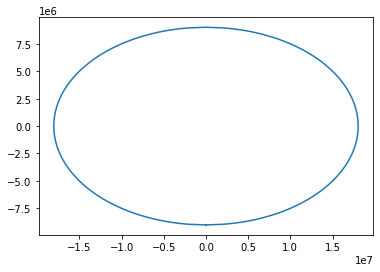

In [16]:
plt.plot(m.boundary.xy[0], m.boundary.xy[1])

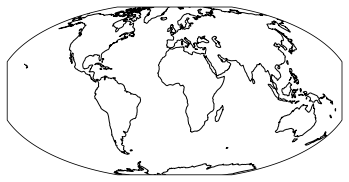

In [17]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
ax.set_extent((-170, 170, -80, 80), crs=ccrs.Geodetic())

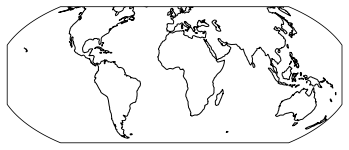

In [18]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
ax.set_extent((-170, 170, -60, 60), crs=ccrs.Geodetic())

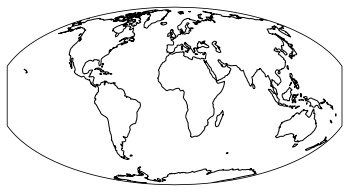

In [21]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
ax.set_extent((-170, 170, -90, 90), crs=ccrs.Geodetic())

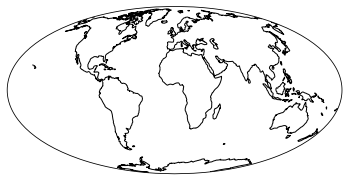

In [28]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

d_eps = 0.0001 

ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
ax.set_extent((-(180 - d_eps), (180 - d_eps), -90, 90), crs=ccrs.Geodetic())

ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=(-18040095.696147293, 18040095.696147293), y_limits=(-9020047.847897757, 9020047.847897757)).

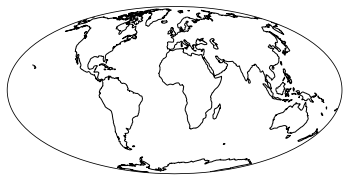

In [41]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

d_eps = 0.0

ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
ax.set_extent((-180.0, 180.0, -80.0, 80.0), crs=ccrs.Geodetic())

In [36]:
ax.get_extent()

(170.99999999999935, 180.0, -89.99999999999966, 89.99999999999966)

In [37]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      ~/miniconda3/envs/yt_py39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py
Type:      method


https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html


The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.

ValueError: Expected a projection subclass. Cannot handle a <class 'cartopy.crs.Globe'> in imshow.

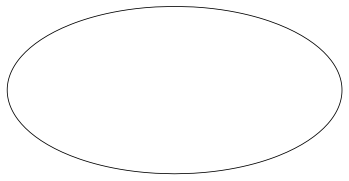

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np 

data = np.random.random((10, 15))

plt.figure(figsize=(6, 7))
ax1 = plt.subplot(211, projection=ccrs.Mollweide())

ax1.imshow(data, transform=ccrs.Globe(), extent=(-100, 100, -58, 10))

In [4]:
p=ccrs.Mollweide()

In [25]:
extent_tf = p.transform_points(ccrs.Geodetic(), 
                   np.array([-170, -170, 170, 170]), 
                   np.array([-80, 80, -80, 80]),
                   np.array([1, 1, 1, 1]))
extent_tf

array([[-5.55321929e+06, -8.52748604e+06,  1.00000000e+00],
       [-5.55321929e+06,  8.52748604e+06,  1.00000000e+00],
       [ 5.55321929e+06, -8.52748604e+06,  1.00000000e+00],
       [ 5.55321929e+06,  8.52748604e+06,  1.00000000e+00]])

In [26]:
new_extent = (min(extent_tf[:, 0]), max(extent_tf[:, 0]), min(extent_tf[:, 1]), max(extent_tf[:, 1]))
new_extent

(-5553219.288515829, 5553219.288515829, -8527486.04177697, 8527486.04177697)

((-18040095.696147293, 18040095.696147293),
 (-9020047.847897757, 9020047.847897757))

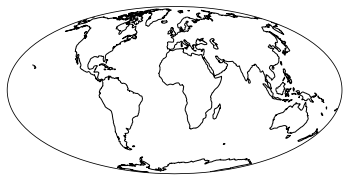

In [46]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np 

data = np.random.random((10, 15))

plt.figure(figsize=(6, 7))
ax1 = plt.subplot(211, projection=p)

ax1.coastlines()
ax1.projection.x_limits, ax1.projection.y_limits
# ax1.set_global()
# ax1.get_extent()

In [47]:
p = ax1.projection

In [49]:
p.x_limits

<Geographic 2D CRS: GEOGCRS["unknown",DATUM["unknown",ELLIPSOID["unkno ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

Need to check if extents from other transform are valid

In [50]:
p2 = ccrs.PlateCarree()


In [51]:
p2.x_limits

(-180, 180)

In [52]:
p2.y_limits

(-90, 90)

In [53]:
global_extent = p2.x_limits + p2.y_limits
global_extent

(-180, 180, -90, 90)

In [32]:
p = ccrs.Mollweide()

In [44]:
np.min(p.boundary.xy[0]), np.min(p.boundary.xy[1])


(-18040095.696147293, -9020047.847897757)

In [45]:
c = ccrs.Geodetic()
c.transform_point(p, np.min(p.boundary.xy[0]), np.min(p.boundary.xy[1]))


CRSError: Invalid projection: epsg:-9020047.847897757: (Internal Proj Error: proj_create: crs not found)

In [6]:
p.transform_points?

Signature: p.transform_points(src_crs, x, y, z=None, trap=False)
Docstring:
transform_points(src_crs, x, y[, z])

Transform the given coordinates, in the given source
coordinate system (``src_crs``), to this coordinate system.

Parameters
----------
src_crs
    instance of :class:`CRS` that represents the
    coordinate system of ``x``, ``y`` and ``z``.
x
    the x coordinates (array), in ``src_crs`` coordinates,
    to transform.  May be 1 or 2 dimensional.
y
    the y coordinates (array), in ``src_crs`` coordinates,
    to transform.  Its shape must match that of x.
z: optional
    the z coordinates (array), in ``src_crs`` coordinates, to
    transform.  Defaults to None.
    If supplied, its shape must match that of x.
trap
    Whether proj errors for "latitude or longitude exceeded limits" and
    "tolerance condition error" should be trapped.

Returns
-------
    Array of shape ``x.shape + (3, )`` in this coordinate system.
File:      ~/miniconda3/envs/yt_dev/lib/python3.9/site-pa

In [ ]:
ax1.projection.x_limits, ax1.projection.y_limits, ax1.projection.threshold

In [52]:
import numpy as np


lon = np.linspace(-180, 180, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

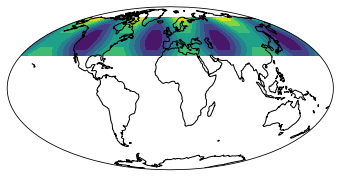

In [53]:
projection = ccrs.Mollweide()
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

data_crs = ccrs.PlateCarree()

# ...but now using the transform argument
ax.contourf(lon, lat, data, transform=data_crs)
plt.show()

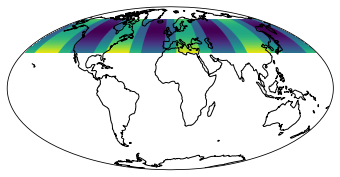

In [54]:
projection = ccrs.Mollweide()
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

data_crs = ccrs.PlateCarree()

# ...but now using the transform argument
extent = (min(lon), max(lon), min(lat), max(lat))
ax.imshow(data, transform=data_crs, extent=extent)
plt.show()

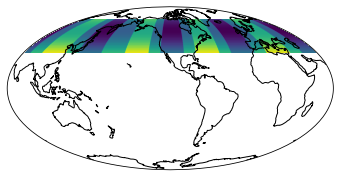

In [59]:
projection = ccrs.Mollweide(central_longitude=-110)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

data_crs = ccrs.PlateCarree()

# ...but now using the transform argument
extent = (min(lon), max(lon), min(lat), max(lat))
ax.imshow(data, transform=data_crs, extent=extent)
# ax.set_extent(extent)
plt.show()

In [ ]:
ax.

In [48]:
ccrs.Geodetic?

Init signature: ccrs.Geodetic(globe=None)
Docstring:     
Define a latitude/longitude coordinate system with spherical topology,
geographical distance and coordinates are measured in degrees.
Init docstring:
Parameters
----------
globe: A :class:`cartopy.crs.Globe`, optional
    Defaults to a "WGS84" datum.
File:           ~/miniconda3/envs/yt_py39/lib/python3.9/site-packages/cartopy/crs.py
Type:           type
Subclasses:     


yt : [INFO     ] 2022-07-29 17:10:12,447 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-07-29 17:10:12,448 Parameters: domain_dimensions         = [100 181 361]
yt : [INFO     ] 2022-07-29 17:10:12,449 Parameters: domain_left_edge          = [   0.  -90. -180.]
yt : [INFO     ] 2022-07-29 17:10:12,449 Parameters: domain_right_edge         = [2900.   90.  180.]
yt : [INFO     ] 2022-07-29 17:10:12,450 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-07-29 17:10:12,535 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-07-29 17:10:12,535 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-07-29 17:10:12,536 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-07-29 17:10:12,537 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-07-29 17:10:12,537 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-07-29 17:10:12,540 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
yt : [WARNING  ] 2022-07-29 17:10:12,562 Plottin


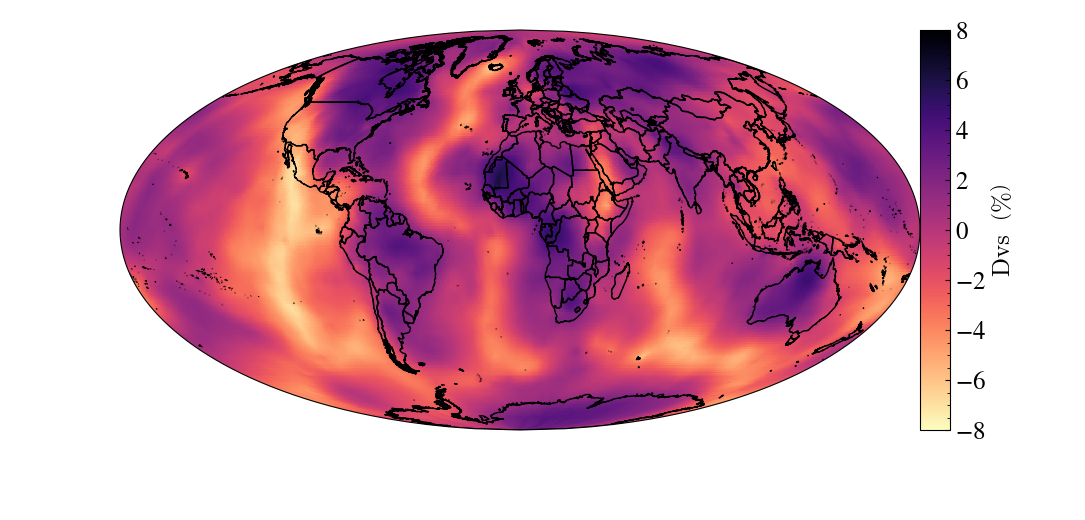

In [1]:
import xarray as xr
import yt
import os
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs

ddir = os.path.join(yt.config.ytcfg.get('yt', 'test_data_dir'), 'sample_nc')

# https://ds.iris.edu/files/products/emc/emc-files/GYPSUM_percent.nc : a global model
# https://ds.iris.edu/files/products/emc/emc-files/wUS-SH-2010_percent.nc : a non-global model covering the western US


datasets = {
    "internal_geographic_partial": os.path.join(ddir, 'wUS-SH-2010_percent.nc'),
    "internal_geographic_global": os.path.join(ddir, 'GYPSUM_percent.nc'),
}


def get_internal_IRIS(case):
    # both datasets have the same variables and dimension order

    fi = datasets[case]

    with xr.open_dataset(fi) as xr_ds:
        dvs = xr_ds.dvs.to_masked_array().data
        deprng = [xr_ds.depth.data.min(), xr_ds.depth.data.max()]
        lonrng = [xr_ds.longitude.data.min(), xr_ds.longitude.data.max()]
        latrng = [xr_ds.latitude.data.min(), xr_ds.latitude.data.max()]

    data = {'dvs': (dvs, "%")}

    bbox = np.array([
        deprng,
        latrng,
        lonrng
    ])

    dims = ['depth', 'latitude', 'longitude']

    return yt.load_uniform_grid(data, data['dvs'][0].shape, 1.0,
                                geometry=("internal_geographic", dims),
                                bbox=bbox)


ds = get_internal_IRIS("internal_geographic_global")

c = ds.domain_center
c[0] = 100
p = yt.SlicePlot(ds,'depth','dvs', center=c)
p.set_log('dvs',False)
p.set_zlim('dvs',-8, 8)
p.set_cmap('dvs','magma_r')

p._setup_plots()
carto_ax = p.plots['dvs'].axes
carto_ax.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '10m',
        edgecolor='black', facecolor='none'))
p.show()

yt : [INFO     ] 2022-07-29 17:10:30,437 xlim = -50.000000 50.000000
yt : [INFO     ] 2022-07-29 17:10:30,437 ylim = -25.000000 25.000000
yt : [INFO     ] 2022-07-29 17:10:30,438 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-07-29 17:10:30,439 xlim = -50.000000 50.000000
yt : [INFO     ] 2022-07-29 17:10:30,439 ylim = -25.000000 25.000000
yt : [INFO     ] 2022-07-29 17:10:30,441 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
yt : [WARNING  ] 2022-07-29 17:10:30,461 Plotting ('stream', 'dvs'): Both positive and negative values. Min = -4.869949817657471 %, Max = 6.229640007019043 %.
yt : [WARNING  ] 2022-07-29 17:10:30,462 Switching to symlog colorbar scaling.
yt : [INFO     ] 2022-07-29 17:10:30,481 Setting extent to [-50.0, 50.0, -25.0, 25.0].



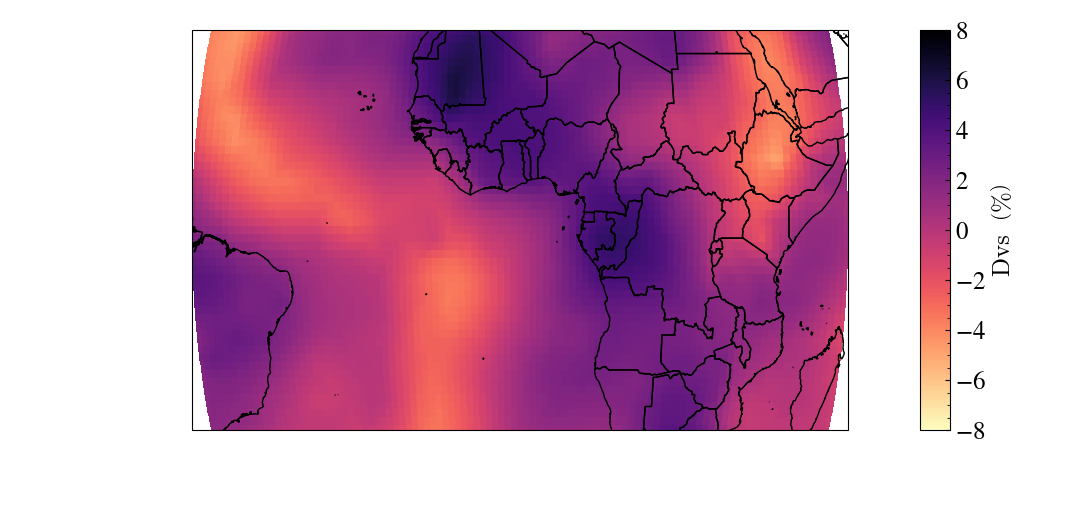

In [2]:

c = ds.domain_center
c[0] = 100
p = yt.SlicePlot(ds,'depth','dvs', center=c, width=[100, 50])
p.set_log('dvs',False)
p.set_zlim('dvs',-8, 8)
p.set_cmap('dvs','magma_r')

p._setup_plots()
carto_ax = p.plots['dvs'].axes
carto_ax.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '10m',
        edgecolor='black', facecolor='none'))

p.show()

yt : [INFO     ] 2022-07-29 17:10:42,449 xlim = -50.000000 50.000000
yt : [INFO     ] 2022-07-29 17:10:42,450 ylim = -25.000000 25.000000
yt : [INFO     ] 2022-07-29 17:10:42,451 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-07-29 17:10:42,453 xlim = -50.000000 50.000000
yt : [INFO     ] 2022-07-29 17:10:42,454 ylim = -25.000000 25.000000
yt : [INFO     ] 2022-07-29 17:10:42,457 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
yt : [WARNING  ] 2022-07-29 17:10:42,485 Plotting ('stream', 'dvs'): Both positive and negative values. Min = -4.869949817657471 %, Max = 6.229640007019043 %.
yt : [WARNING  ] 2022-07-29 17:10:42,486 Switching to symlog colorbar scaling.
yt : [INFO     ] 2022-07-29 17:10:42,506 Setting extent to [-50.0, 50.0, -25.0, 25.0].



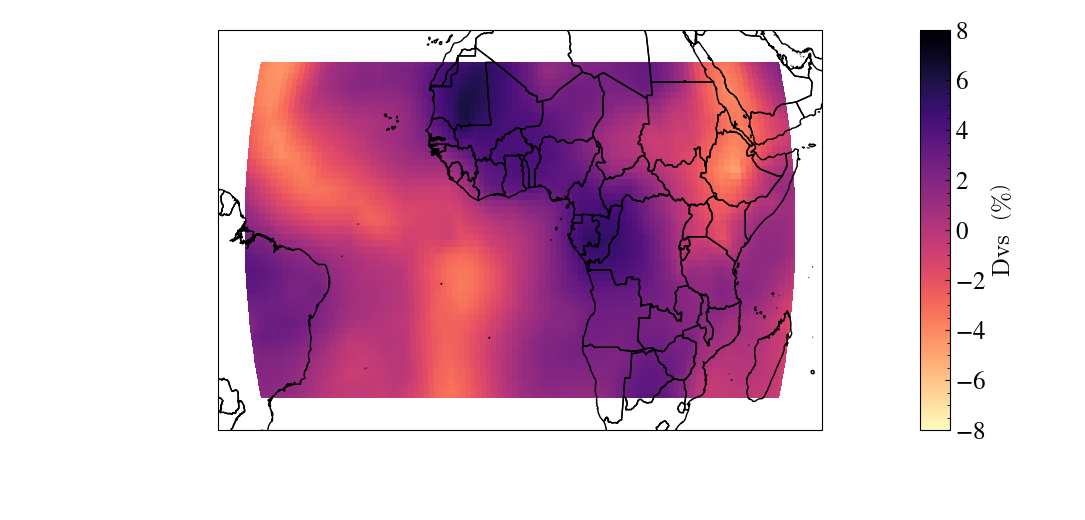

In [3]:

c = ds.domain_center
c[0] = 100
p = yt.SlicePlot(ds,'depth','dvs', center=c, width=[100, 50])
p.set_log('dvs',False)
p.set_zlim('dvs',-8, 8)
p.set_cmap('dvs','magma_r')

p._setup_plots()
carto_ax = p.plots['dvs'].axes
carto_ax.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '10m',
        edgecolor='black', facecolor='none'))
carto_ax.set_extent([-55, 55, -30, 30], crs=ccrs.PlateCarree())
p.show()

In [5]:
mw = ccrs.Mollweide()


In [6]:
mw.x_limits

(-18040095.696147293, 18040095.696147293)

In [7]:
mw.threshold

100000.0

In [8]:
pc = ccrs.PlateCarree()
pc.threshold

0.5